In [67]:
"""
author: EdgardoCS @FSU Jena
date: 08.05.2025
"""

import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.ma.core import zeros
from scipy.ndimage import label

pd.options.mode.chained_assignment = None


In [68]:
index_options = {
    "0x": 0,
    "1-5x": 1,
    "6-10x": 2,
    "11-20x": 3,
    "21-50x": 4,
    "> 50x": 5
}

rel_options = {
    "0 - Not at all satisfied": 0,
    1: 1,
    2: 2,
    3: 3,
    4: 4,
    5: 5,
    6: 6,
    7: 7,
    8: 8,
    9: 9,
    "10 - Completely satisfied": 10
}

frequency_map = {
    "0x": 0,
    "1-5x": 3,
    "6-10x": 8,
    "11-20x": 15,
    "21-50x": 35,
    "> 50x": 60
}
length_map = {
    "0-2": 1,
    "3-5": 4,
    "6-10": 8,
    "11-20": 15,
    "21+": 25,
}


In [69]:
df = pd.read_excel("source/only_couples_data.xlsx")

df["kiss_diff"] = None
df["hold_diff"] = None
df["hug_diff"] = None

df["relsat"] = df["relsat"].map(rel_options)
df["prelsat"] = df["prelsat"].map(rel_options)

df["tf_kiss"] = df["tf_kiss"].map(frequency_map)
df["ptf_kiss"] = df["ptf_kiss"].map(frequency_map)
df["tf_hold"] = df["tf_hold"].map(frequency_map)
df["ptf_hold"] = df["ptf_hold"].map(frequency_map)
df["tf_hug"] = df["tf_hug"].map(frequency_map)
df["ptf_hug"] = df["ptf_hug"].map(frequency_map)


In [70]:
for i in range(0, len(df)):
    # print(i, index_options[df['ptf_kiss'][i]] - index_options[df['tf_kiss'][i]])
    if df['tf_kiss'][i] == df['ptf_kiss'][i]:
        df.loc[i, "kiss_diff"] = 0
    if df['tf_kiss'][i] > df['ptf_kiss'][i]:
        df.loc[i, "kiss_diff"] = 1
    if (df['tf_kiss'][i] - df['ptf_kiss'][i]) > 2:
        df.loc[i, "kiss_diff"] = 2
    if df['tf_kiss'][i] < df['ptf_kiss'][i]:
        df.loc[i, "kiss_diff"] = -1
    if (df['ptf_kiss'][i] - df['tf_kiss'][i]) > 2:
        df.loc[i, "kiss_diff"] = -2

    if df['tf_hold'][i] == df['ptf_hold'][i]:
        df.loc[i, "hold_diff"] = 0
    if df['tf_hold'][i] > df['ptf_hold'][i]:
        df.loc[i, "hold_diff"] = 1
    if (df['tf_hold'][i] - df['ptf_hold'][i]) > 2:
        df.loc[i, "hold_diff"] = 2
    if df['tf_hold'][i] < df['ptf_hold'][i]:
        df.loc[i, "hold_diff"] = -1
    if (df['ptf_hold'][i] - df['tf_hold'][i]) > 2:
        df.loc[i, "hold_diff"] = -2

    if df['tf_hug'][i] == df['ptf_hug'][i]:
        df.loc[i, "hug_diff"] = 0
    if df['tf_hug'][i] > df['ptf_hug'][i]:
        df.loc[i, "hug_diff"] = 1
    if (df['tf_hug'][i] - df['ptf_hug'][i]) > 2:
        df.loc[i, "hug_diff"] = 2
    if df['tf_hug'][i] < df['ptf_hug'][i]:
        df.loc[i, "hug_diff"] = -1
    if (df['ptf_hug'][i] - df['tf_hug'][i]) > 2:
        df.loc[i, "hug_diff"] = -2

In [71]:
df1 = df[df["reldur_class"] != "."]
df1.rename(columns={'reldur_class': 'Relationship length'}, inplace=True)
df1["Relationship length"] = df1["Relationship length"].map(length_map)


Text(0.5, 0, 'Kiss difference')

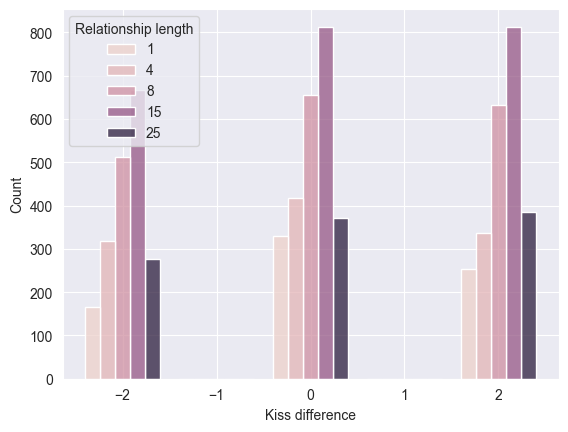

In [72]:
fig, ax = plt.subplots()
sns.histplot(
    data=df1,
    x="kiss_diff",
    hue="Relationship length",
    multiple="dodge",
    discrete=True,
    shrink=.8,
)
ax.set_xlabel("Kiss difference")

Text(0.5, 0, 'Hold difference')

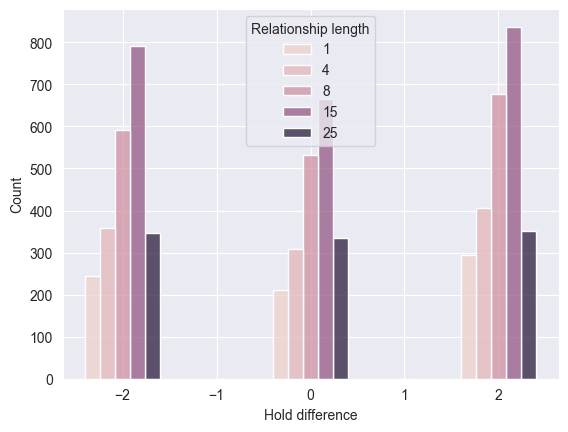

In [73]:
fig, ax = plt.subplots()
sns.histplot(
    data=df1,
    x="hold_diff",
    hue="Relationship length",
    multiple="dodge",
    discrete=True,
    shrink=.8
)
ax.set_xlabel("Hold difference")

Text(0.5, 0, 'Hug difference')

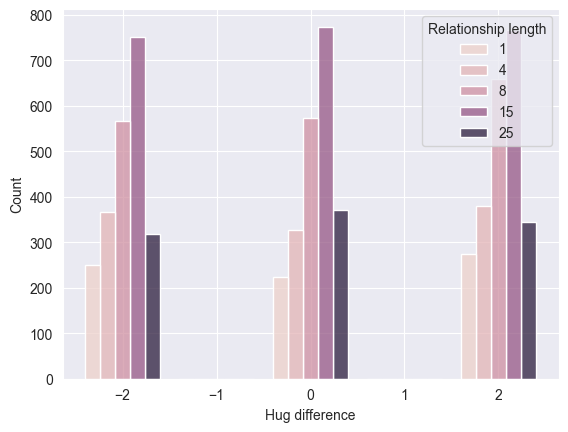

In [74]:
fig, ax = plt.subplots()
sns.histplot(
    data=df1,
    x="hug_diff",
    hue="Relationship length",
    multiple="dodge",
    discrete=True,
    shrink=.8,
)
ax.set_xlabel("Hug difference")

Now lets focus on the Partner == Anchor match


Text(0.5, 0, 'Relationship satisfaction')

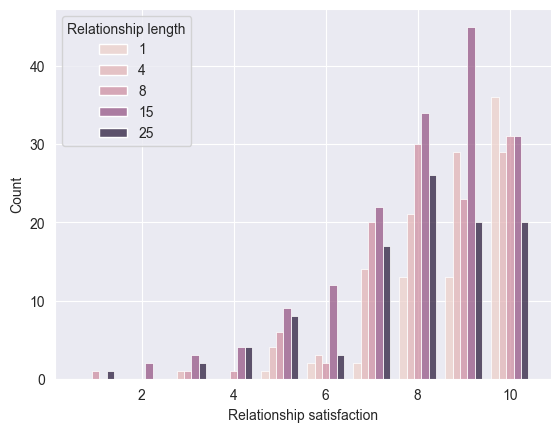

In [75]:
df_match = df1[(df1["kiss_diff"] == 0) & (df1["hold_diff"] == 0) & (df1["hug_diff"] == 0)]

fig, ax = plt.subplots()
sns.histplot(
    data=df_match,
    x="relsat",
    hue="Relationship length",
    multiple="dodge",
    discrete=True,
    shrink=.8,
)
ax.set_xlabel("Relationship satisfaction")

In [76]:
df_kiss = df1[df1["kiss_diff"] == 0]
df_hold = df1[df1["hold_diff"] == 0]
df_hug = df1[df1["hug_diff"] == 0]

In [77]:
kiss_match = df_kiss["tf_kiss"].value_counts()

df_kiss.rename(columns={'tf_kiss': 'Kiss'}, inplace=True)
df_kiss_age = df_kiss.groupby("age")["Kiss"].mean().reset_index()
df_kiss_rel = df_kiss.groupby("Relationship length")["Kiss"].mean().reset_index()

In [78]:
hold_match = df_hold["tf_kiss"].value_counts()

df_hold.rename(columns={'tf_hold': 'Hold'}, inplace=True)
df_hold_age = df_hold.groupby("age")["Hold"].mean().reset_index()
df_hold_rel = df_hold.groupby("Relationship length")["Hold"].mean().reset_index()


In [79]:
hug_match = df_hold["tf_kiss"].value_counts()

df_hug.rename(columns={'tf_hug': 'Hug'}, inplace=True)
df_hug_age = df_hug.groupby("age")["Hug"].mean().reset_index()
df_hug_rel = df_hug.groupby("Relationship length")["Hug"].mean().reset_index()

In [80]:
df_merged = pd.merge(df_kiss_age, df_hold_age, on="age", how="outer")
df_merged = pd.merge(df_merged, df_hug_age, on="age", how="outer")

df_long = pd.melt(df_merged, id_vars="age", var_name="Touch", value_name="value")
# Plot

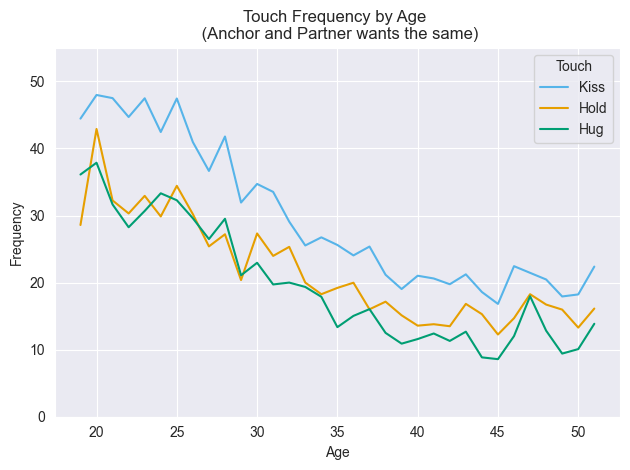

In [81]:
sns.lineplot(data=df_long, x="age", y="value", hue="Touch", palette=["#56B4E9", "#E69F00", "#009E73"])
plt.title("Touch Frequency by Age \n (Anchor and Partner reported the same)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.ylim(0, 55)
plt.savefig('output/anchor_match_partner(age vs touch).png', dpi=300)
plt.show()

In [82]:

df_merged = pd.merge(df_kiss_rel, df_hold_rel, on="Relationship", how="outer")
df_merged = pd.merge(df_merged, df_hug_rel, on="Relationship", how="outer")

df_long = pd.melt(df_merged, id_vars="Relationship", var_name="Touch", value_name="value")
# Plot
sns.lineplot(data=df_long, x="Relationship", y="value", hue="Touch", palette=["#56B4E9", "#E69F00", "#009E73"])
plt.title("Touch Frequency by Age \n (Anchor and Partner wants the same)")
plt.xlabel("Relationship duration (years)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.ylim(0, 55)
plt.savefig('output/anchor_match_partner(relationship vs touch).png', dpi=300)
plt.show()

KeyError: 'Relationship'

Now, lets see what happens when you want more touch from your partner

In [220]:
df_kiss = df1[df1["kiss_diff"] > 0]
df_hold = df1[df1["hold_diff"] > 0]
df_hug = df1[df1["hug_diff"] > 0]

In [221]:
# df_kiss["Kiss"] = df["tf_kiss"].map(frequency_map)

In [222]:
# df_kiss = df_kiss.groupby("age")["Kiss"].mean().reset_index()

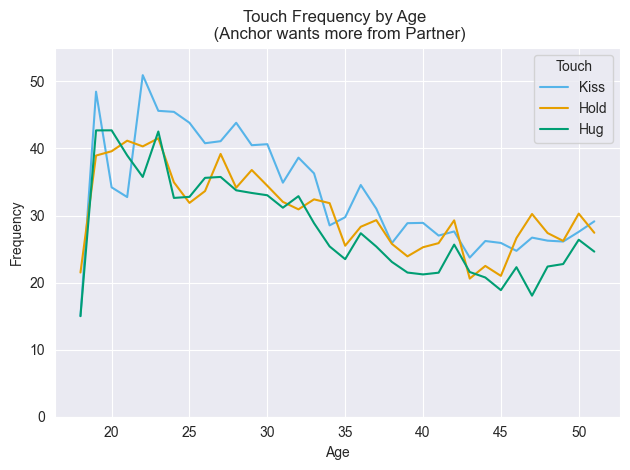

In [223]:
df_kiss["Kiss"] = df["tf_kiss"].map(frequency_map)
df_kiss = df_kiss.groupby("age")["Kiss"].mean().reset_index()

df_hold["Hold"] = df["tf_hold"].map(frequency_map)
df_hold = df_hold.groupby("age")["Hold"].mean().reset_index()

df_hug["Hug"] = df["tf_hug"].map(frequency_map)
df_hug = df_hug.groupby("age")["Hug"].mean().reset_index()

df_merged = pd.merge(df_kiss, df_hold, on="age", how="outer")
df_merged = pd.merge(df_merged, df_hug, on="age", how="outer")

df_long = pd.melt(df_merged, id_vars="age", var_name="Touch", value_name="value")
# Plot
sns.lineplot(data=df_long, x="age", y="value", hue="Touch", palette=["#56B4E9", "#E69F00", "#009E73"])
plt.title("Touch Frequency by Age \n (Anchor wants more from Partner)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.ylim(0, 55)
plt.savefig('output/anchor_more_than_partner(age vs touch).png', dpi=300)
plt.show()

Finally, lets see what happens when your partner wants more touch from you

In [224]:
df_kiss = df1[df1["kiss_diff"] < 0]
df_hold = df1[df1["hold_diff"] < 0]
df_hug = df1[df1["hug_diff"] < 0]

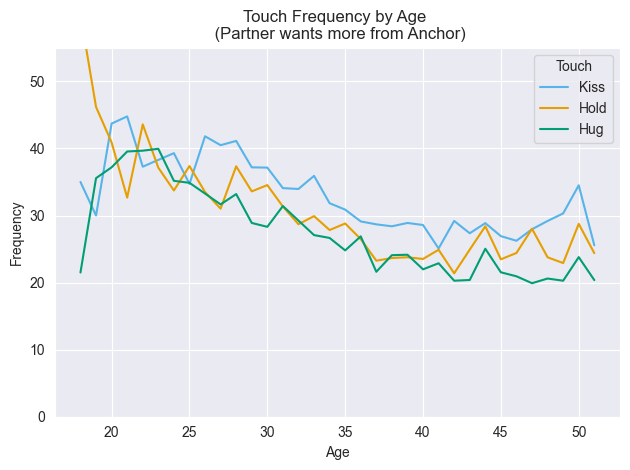

In [225]:
df_kiss["Kiss"] = df["ptf_kiss"].map(frequency_map)
df_kiss = df_kiss.groupby("age")["Kiss"].mean().reset_index()

df_hold["Hold"] = df["ptf_hold"].map(frequency_map)
df_hold = df_hold.groupby("age")["Hold"].mean().reset_index()

df_hug["Hug"] = df["ptf_hug"].map(frequency_map)
df_hug = df_hug.groupby("age")["Hug"].mean().reset_index()

df_merged = pd.merge(df_kiss, df_hold, on="age", how="outer")
df_merged = pd.merge(df_merged, df_hug, on="age", how="outer")

df_long = pd.melt(df_merged, id_vars="age", var_name="Touch", value_name="value")
# Plot
sns.lineplot(data=df_long, x="age", y="value", hue="Touch", palette=["#56B4E9", "#E69F00", "#009E73"])
plt.title("Touch Frequency by Age \n (Partner wants more from Anchor)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.ylim(0, 55)
plt.savefig('output/partner_more_than_anchor(age vs touch).png', dpi=300)
plt.show()

In [ ]:
# TODO:
# Descriptive statistics
# Compare what I want vs what I get
# Compare the difference between what I want vs what my partner gives
# Put on the same plot, what I reported and what MY partner reported